## Part 4: Training a Machine Learning Model to predict instant noodle rating base on the Ramen Rater Dataset

1. Models used

    i. DummyClassfier (for baseline)
    
    ii. LogisticRegression
    
    iii. DecisionTreeClassfier
    
    iV. RandomForestClassfier
    
    
2. Use Confusion Matrix and Classification Report to assess results



In [1]:
import pandas as pd
import os
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#list dir
print(os.listdir())

['.ipynb_checkpoints', 'Part 1 - Cleaning of Data.ipynb', 'Part 2 - Data Extraction and Visualization.ipynb', 'Part 3 - Machine Learning.ipynb', 'Part 4 - Training ML.ipynb', 'The-Big-List-20210117.xlsx', 'thebiglist_clean.csv', 'thebiglist_clean_extended.csv', 'thebiglist_clean_extended_final.csv', '~$The-Big-List-20210117.xlsx']


In [3]:
#import dataframe to be used

df = pd.read_csv('thebiglist_clean_extended_final.csv')
df

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Others,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,5.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Look at Stars column first to ensure there are no issues

In [4]:
df['Stars'].value_counts()

5.000    667
3.500    543
3.750    535
4.000    439
4.500    246
3.250    222
4.250    215
3.000    172
2.750    110
2.000     95
2.500     94
4.750     93
1.500     50
0.000     40
1.000     38
2.250     29
1.750     28
0.500     20
0.250     17
1.250     14
1.100      2
3.100      2
2.900      2
0.750      2
2.800      2
4.125      2
2.850      1
2.300      1
3.600      1
3.700      1
3.650      1
0.100      1
3.400      1
3.125      1
1.800      1
3.200      1
2.100      1
2.125      1
0.900      1
Name: Stars, dtype: int64

there are rating on the Stars column that are of too low a frequency for the ML models to capture. As such they need to be grouped together under one rating

(array([  58.,   23.,   54.,   79.,  127.,  209.,  399., 1081.,  656.,
        1006.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

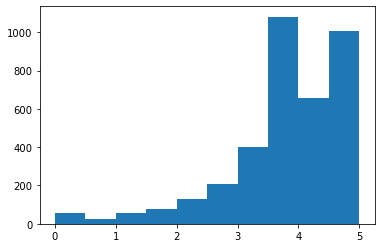

In [5]:
#Consider where the cut off point is to be by looking at the stars histogram

import matplotlib.pyplot as plt

plt.hist(df['Stars'])

In [6]:
# One way is to take the median where anything below is bad and anything above is good
df['Stars'].median()

3.75

In [16]:
# Another way is to base on the frequency
print(f'The total count of variables: {len(df)}')
print('frequency above 4.0')
print(len(df[df['Stars'] > 4]))

The total count of variables: 3692
frequency above 4.0
1223


In [22]:
#qcut split the stars column base on the median
#anything 3.75 and above versus anything 3.75 and below
#And create a new column to show
df['binStars'] = pd.qcut(df['Stars'], q=2, labels = [0,1])
df

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Indonesia,in_Japan,in_Malaysia,in_Others,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States,binStars
0,5.0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df['binStars'].value_counts()

0    2030
1    1662
Name: binStars, dtype: int64

In [24]:
#Prepare independent and dependent variables for ML

X = df.drop(['binStars','Stars'], axis =1)
y = df['binStars']

In [26]:
#Split dataset into train and test 80/20

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   stratify = y)

In [30]:
# Set a baseline with a DummyCLassifier

dummy = DummyClassifier()
dummy.fit(X_train,y_train)
dummy_pred = dummy.predict(X_test)

C:\Users\reaso\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [31]:
#Assess performace of DummyClassifier

confusion_matrix(y_test,dummy_pred)

array([[227, 179],
       [185, 148]], dtype=int64)

In [32]:
print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56       406
           1       0.45      0.44      0.45       333

    accuracy                           0.51       739
   macro avg       0.50      0.50      0.50       739
weighted avg       0.51      0.51      0.51       739



In [35]:
# LogisticRegression

logr = LogisticRegression()
logr.fit(X_train,y_train)
logr_pred =logr.predict(X_test)

In [36]:
#Assess the performance of the Logistic Regression Model

confusion_matrix(y_test,logr_pred)

array([[280, 126],
       [145, 188]], dtype=int64)

In [37]:
print(classification_report(y_test,logr_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       406
           1       0.60      0.56      0.58       333

    accuracy                           0.63       739
   macro avg       0.63      0.63      0.63       739
weighted avg       0.63      0.63      0.63       739



In [38]:
#DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)

In [39]:
#Assess the performance of the DecisionTreeClassifier

confusion_matrix(y_test,tree_pred)

array([[283, 123],
       [137, 196]], dtype=int64)

In [40]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       406
           1       0.61      0.59      0.60       333

    accuracy                           0.65       739
   macro avg       0.64      0.64      0.64       739
weighted avg       0.65      0.65      0.65       739



In [42]:
# RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train,y_train)
forest_pred = forest.predict(X_test)

In [43]:
#Assess the RandomForestClassifier

confusion_matrix(y_test,forest_pred)

array([[272, 134],
       [126, 207]], dtype=int64)

In [44]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       406
           1       0.61      0.62      0.61       333

    accuracy                           0.65       739
   macro avg       0.65      0.65      0.65       739
weighted avg       0.65      0.65      0.65       739



In [45]:
#Check the logisticRegression model to see what ticks
logr.coef_[0]

array([ 0.45749884, -0.62961739, -0.27601038, -0.27291053, -0.77242956,
        0.18639325, -0.20375261,  0.43485455, -0.24872551, -0.42124564,
        0.97504971, -0.15988646,  0.66689495, -0.77505114, -0.25101986,
        0.68422545,  1.93838242, -0.18477887,  0.15992896,  0.73773748,
       -0.27427408, -0.9064383 ,  0.52259469,  0.61563002, -0.26390536,
        0.26976047, -1.22954302, -0.33970609, -0.48909047, -0.05621097,
       -0.41955201, -0.39025954, -0.1373069 ,  0.3532012 , -0.44941959,
        1.30440894,  0.15483421, -0.10078571,  0.41163105,  1.12756288,
        0.82336393,  0.78493756, -0.72601098,  0.86751394,  0.20781251,
        0.59209514, -0.93693554,  0.07513663])

In [47]:
#create a dataframe of the coef of logr
logr_feature = pd.DataFrame({'feature': X.columns,
                            'importance': logr.coef_[0]})

#sort the values based on importance of predicting 1 (delicious)
logr_feature.sort_values('importance', ascending = False)

,feature,importance
16,from_MyKuali,1.938382
35,is_Others,1.304409
39,in_Indonesia,1.127563
10,from_MAMA,0.975050
43,in_Singapore,0.867514
40,in_Japan,0.823364
41,in_Malaysia,0.784938
19,from_Nongshim,0.737737
15,from_Master Kong,0.684225
12,from_Mama,0.666895


Positive figures is used to give a good rating while the negative figures are used to get a bad one

In [48]:
#create a dataframe of the importances of the RandomForestClassifier
forest_feature = pd.DataFrame({'feature': X.columns,
                            'importance': forest.feature_importances_})

#sort the values based on importance of predicting 1 (delicious)
forest_feature.sort_values('importance', ascending = False)

,feature,importance
0,isSpicy,0.086077
42,in_Others,0.082194
36,is_Pack,0.070669
34,is_Cup,0.058203
3,hasSeafood,0.057875
1,hasChicken,0.055892
20,from_Others,0.044093
2,hasBeef,0.041148
40,in_Japan,0.034113
18,from_Nissin,0.032141


In [49]:
#create a dataframe of the DecisionTreeClassifier

tree_feature = pd.DataFrame({'feature': X.columns,
                            'importance': tree.feature_importances_})

#sort the values based on importance of predicting 1 (delicious)

tree_feature.sort_values('importance', ascending = False)

,feature,importance
42,in_Others,0.138283
0,isSpicy,0.104465
36,is_Pack,0.062003
1,hasChicken,0.054586
3,hasSeafood,0.051145
34,is_Cup,0.048261
46,in_Thailand,0.037670
2,hasBeef,0.034470
37,is_Tray,0.028996
40,in_Japan,0.027492
